#### 代表的なMCMCであるMetropolis-Hasting algorithm法(M-H法)の実装

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import stats

In [8]:
I_4 = np.identity(4)
def reLu(x):
    return np.max([0, x])
def f_theta(x, theta=(0,0,0,0)):
    return theta[0] * reLu(theta[1] * x + theta[2]) + theta[3]

def random_multinormal(d, mu, Sigma):
    Z = np.array([x for x in np.random.normal(0,1,d)])
    return linalg.sqrtm(Sigma, 1/2) @ Z + mu
def theta_pdf(theta, mean=np.zeros(4), cov=I_4):
    return stats.multivariate_normal.pdf(theta, mean=mean, cov=cov)
def suggest_pdf(theta, given_theta, delta):
    return theta_pdf(given_theta, mean=theta, cov=delta * I_4)
def X_pdf(x):
    return stats.norm.pdf(x, loc=0, scale=1)
def Y_given_X_pdf(y, given_x, given_theta):
    return stats.norm.pdf(y, loc=f_theta(given_x, theta=given_theta), scale=1)
def theta_given_XY_pdf_niatarumono(theta, X, Y):
    return theta_pdf(theta) * np.prod([X_pdf(x)*Y_given_X_pdf(y,x,theta) for x,y in zip(X,Y)])

In [3]:
np.random.seed(20221116)
N = 50
theta = random_multinormal(4, np.zeros(4), I_4)

X = np.random.normal(loc=0, scale=1, size=N)
Y = np.array([np.random.normal(loc=f_theta(x, theta=theta), scale=1) for x in X])

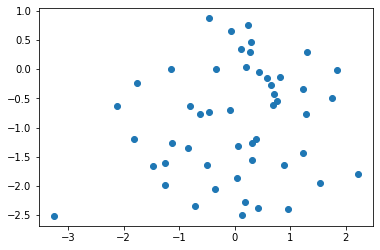

In [4]:
plt.scatter(X, Y)
plt.show()

1. $\theta$ の初期値を設定
2. $Q(\theta | \theta')$ に従って $\theta'$ を生成
3. 確率 
$$min\{ 1, \frac{\pi(\theta' | X^N) Q(\theta | \theta')}{\pi(\theta | X^N) Q(\theta' | \theta)} \}$$
で $\theta'$ を採択

4. 繰り返す

In [10]:
def indicator(X, Y, theta, given_theta, delta):
    return theta_given_XY_pdf_niatarumono(theta=theta, X=X, Y=Y) / suggest_pdf(theta=theta, given_theta=given_theta, delta=delta)
def accept_ratio(theta, theta_, X, Y, delta):
    return indicator(X, Y, theta=theta_,given_theta=theta, delta=delta) / indicator(X, Y, theta=theta,given_theta=theta_, delta=delta)

In [ ]:
delta = 1 # 適当
thetas = [] # theta_を保存していく
theta_ = (0,0,0,0) # 1. 初期値

for i in range(3000):
    temp_theta_ = random_multinormal(4, theta_, delta * I_4) # 2. theta' を生成
    next = [theta_, temp_theta_]
    ar = accept_ratio(theta_, temp_theta_, X, Y, delta)
    print(ar)
    if ar >= 1:
        next_index = 1
    else:
        next_index = np.random.choice([0,1], p=[1-ar, ar])
    theta_ = next[next_index]
    thetas.append(theta_)


In [81]:
thetas_burned = thetas[1000:]

In [85]:
thetas_burned

[array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([-0.27090254, -0.17180562,  0.99065944, -0.45135586]),
 array([

In [86]:
np.array(thetas_burned).T

array([[-0.27090254, -0.27090254, -0.27090254, ...,  1.13984687,
         1.13984687,  1.13984687],
       [-0.17180562, -0.17180562, -0.17180562, ...,  0.43000976,
         0.43000976,  0.43000976],
       [ 0.99065944,  0.99065944,  0.99065944, ..., -1.23925741,
        -1.23925741, -1.23925741],
       [-0.45135586, -0.45135586, -0.45135586, ..., -1.01206534,
        -1.01206534, -1.01206534]])

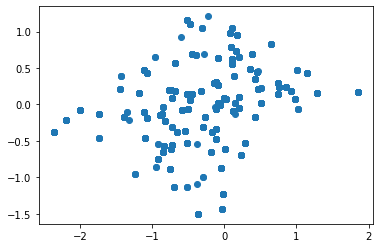

In [87]:
plt.scatter((np.array(thetas_burned).T)[0],(np.array(thetas_burned).T)[1])